In [2]:
!unzip '/content/drive/MyDrive/Проекты ML/Данные хакатона Raifhack DS-20210925T041125Z-001.zip'

Archive:  /content/drive/MyDrive/Проекты ML/Данные хакатона Raifhack DS-20210925T041125Z-001.zip
  inflating: Данные хакатона Raifhack DS/baseline/README.md  
  inflating: Данные хакатона Raifhack DS/baseline/requirements.txt  
  inflating: Данные хакатона Raifhack DS/baseline/pyproject.toml  
  inflating: Данные хакатона Raifhack DS/data/test_submission.csv  
  inflating: Данные хакатона Raifhack DS/baseline/predict.py  
  inflating: Данные хакатона Raifhack DS/baseline/train.py  
  inflating: Данные хакатона Raifhack DS/data/test.csv  
  inflating: Данные хакатона Raifhack DS/baseline/raifhack_ds/utils.py  
  inflating: Данные хакатона Raifhack DS/baseline/raifhack_ds/__init__.py  
  inflating: Данные хакатона Raifhack DS/baseline/raifhack_ds/metrics.py  
  inflating: Данные хакатона Raifhack DS/baseline/raifhack_ds/features.py  
  inflating: Данные хакатона Raifhack DS/baseline/raifhack_ds/settings.py  
  inflating: Данные хакатона Raifhack DS/baseline/raifhack_ds/model.py  
  infla

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

import typing
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
df = pd.read_csv('train_start.csv')
df = df.drop(['id', 'floor', 'city'], axis=1).fillna(0)
df.head()

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0
1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0
2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0
3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0
4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0


In [33]:
list(df.columns).index('per_square_meter_price')

59

In [34]:
columns = df_parsed.columns[[2, 10, 14, 16, 18, 21, 22, 23, 26, 27, 29, 30, 
                          31, 32, 34, 35, 39, 42, 45, 46, 48, 50, 52, 57, 
                          58, 59, 61, 62, 64, 65, 66, 68, 69, 71, 72, 73]]
print(list(columns).index('per_square_meter_price'))

Index(['osm_amenity_points_in_0.001', 'osm_catering_points_in_0.001', 'osm_city_closest_dist', 'osm_city_nearest_population', 'osm_crossing_points_in_0.001', 'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001', 'osm_culture_points_in_0.005', 'osm_finance_points_in_0.001', 'osm_finance_points_in_0.005', 'osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005', 'osm_healthcare_points_in_0.0075', 'osm_healthcare_points_in_0.01', 'osm_historic_points_in_0.0075', 'osm_historic_points_in_0.01', 'osm_leisure_points_in_0.005', 'osm_offices_points_in_0.001', 'osm_offices_points_in_0.01', 'osm_shops_points_in_0.001', 'osm_shops_points_in_0.0075', 'osm_subway_closest_dist', 'osm_train_stop_points_in_0.005', 'osm_transport_stop_points_in_0.0075', 'osm_transport_stop_points_in_0.01', 'per_square_meter_price', 'reform_count_of_houses_500', 'reform_house_population_1000', 'reform_mean_floor_count_1000', 'reform_mean_floor_count_500', 'reform_mean_year_building_1000', 'region',
       '

In [37]:
print(list(columns).index('per_square_meter_price'))

25


In [72]:
osm_city_nearest_name = list(df['osm_city_nearest_name'].unique())
# city = list(df['city'].unique())
region = list(df['region'].unique())

def cities2index(data):
  # data['city'] = city.index(data['city'])
    try:
        data['region'] = region.index(data['region'])
    except:
        data['region'] = -1
    try:
        data['osm_city_nearest_name'] = osm_city_nearest_name.index(data['osm_city_nearest_name'])
    except:
        data['osm_city_nearest_name'] = -1
    
    try:
        data['street'] = int(data['street'][1:])
    except:
        data['street'] = 0
    try:
        data['date'] = int(data['date'].split('-')[1])
    except:
        data['date'] = -1
    return data

df_parsed = df.apply(cities2index, axis=1)
df_parsed.head()

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,0,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,0,32.0,27289,1,10,0
1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,1,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,1,280.0,17052,1,10,0
2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,2,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,2,297.4,16913,1,110,0
3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,3,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,3,190.0,10148,1,110,0
4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,4,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,4,60.2,1338,1,10,0


In [73]:
drop_columns = df_parsed.columns[df_parsed.corr()['per_square_meter_price'].abs() < 0.05]
drop_columns_list = ['id', 'floor', 'city'] + list(drop_columns)
print(drop_columns_list)
drop_columns_list = ['id', 'floor', 'city', 'osm_building_points_in_0.001', 'osm_building_points_in_0.005', 
                     'osm_building_points_in_0.0075', 'street',]

['id', 'floor', 'city', 'osm_building_points_in_0.001', 'osm_building_points_in_0.005', 'osm_building_points_in_0.0075', 'osm_building_points_in_0.01', 'osm_transport_stop_closest_dist', 'total_square', 'street', 'date', 'price_type']


In [38]:
columns[25]

'per_square_meter_price'

In [74]:
all_data = pd.read_csv('train.csv').fillna(0)
all_data = all_data.apply(cities2index, axis=1)
all_data = all_data.drop(drop_columns_list, axis=1)
# all_data = all_data[columns]
df_train = pd.read_csv('train.csv').fillna(0)
df_train = df_train.apply(cities2index, axis=1)
df_train = df_train.drop(drop_columns_list, axis=1)
# df_train = df_train[columns]
df_valid = pd.read_csv('valid.csv')
df_valid = df_valid.apply(cities2index, axis=1).fillna(0)
df_valid = df_valid.drop(drop_columns_list, axis=1)
# df_valid = df_valid[columns]
df_test = pd.read_csv('test.csv').fillna(0)
df_test = df_test.apply(cities2index, axis=1)
df_test['per_square_meter_price'] = 0
# df_test = df_test.drop(drop_columns_list, axis=1)
df_test = df_test[all_data.columns]
del df_test['per_square_meter_price']

In [85]:
x = all_data.drop(['per_square_meter_price'], axis=1)
y = all_data['per_square_meter_price']
x_train = df_train.drop(['per_square_meter_price'], axis=1)
y_train = df_train['per_square_meter_price']
x_valid = df_valid.drop(['per_square_meter_price'], axis=1)
y_valid = df_valid['per_square_meter_price']
x_test = df_test
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape)

(223833, 69) (223833,) (55959, 69) (55959,) (2974, 69)


In [96]:
mse = []
mae = []
score = []
depth = []
for i in range(1, 60, 2):
    model = RandomForestRegressor(i)
    model.fit(x_train, y_train)
    predict = model.predict(x_valid)
    true = y_valid
    mse.append(mean_squared_error(true, predict))
    mae.append(mean_absolute_error(true, predict))
    score.append(r2_score(true, predict))
    depth.append(i)
  # print(mean_absolute_error(y_test, predict), mean_squared_error(y_test, predict))

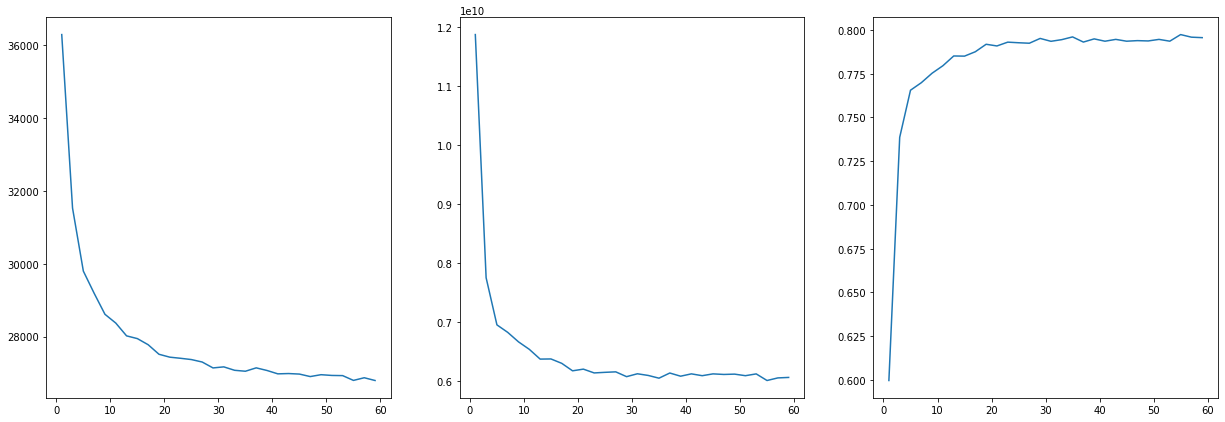

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21, 7))
plt.subplot(1, 3, 1)
plt.plot(depth, mae)
plt.subplot(1, 3, 2)
plt.plot(depth, mse)
plt.subplot(1, 3, 3)
plt.plot(depth, score)
plt.show()

In [195]:
mae.index(min(mae))
mae[41]

31057.99302506625

In [99]:
# model_boost = GradientBoostingRegressor(loss='lad', n_estimators=500, max_depth=21, verbose=1)
# model_tree = DecisionTreeRegressor(max_depth=41, ccp_alpha=0.2)
model_forest = RandomForestRegressor(50)
# model_boost.fit(x, y)
# model_tree.fit(x_train, y_train)
model_forest.fit(x_train, y_train)


RandomForestRegressor(n_estimators=50)

In [101]:
from sklearn.model_selection import cross_val_score

# predict_boost = model_boost.predict(x_valid)
# predict_tree = yscaler.inverse_transform(model_tree.predict(x_valid)).flatten()
predict_forest = model_forest.predict(x_valid)
true = y_valid
# print(mean_absolute_error(true, predict_boost), mean_squared_error(true, predict_boost), r2_score(true, predict_boost), median_absolute_percentage_error(true, predict_boost))
# print(cross_val_score(model_boost, x_valid, y_valid))
# print(mean_absolute_error(true, predict_tree), mean_squared_error(true, predict_tree), r2_score(true, predict_tree), median_absolute_percentage_error(true, predict_tree))
print(mean_absolute_error(y_valid, predict_forest), mean_squared_error(y_valid, predict_forest), r2_score(true, predict_forest), median_absolute_percentage_error(true, predict_forest))

26897.116679180035 6093497021.152738 0.7945553951572353 0.16487617625097134


In [78]:
predict = np.hstack([predict_boost.reshape(-1, 1), predict_tree.reshape(-1, 1), predict_forest.reshape(-1, 1)])
predict = predict.mean(axis=1)

print(mean_absolute_error(true, predict), mean_squared_error(true, predict), r2_score(true, predict))

37931.57412272742 7683259358.407342 0.7409559441297864


In [53]:
n = 5
print(list(true.round())[n*10:n*10+10])
print(list(predict_boost.round())[n*10:n*10+10])

[13680.0, 6982.0, 44770.0, 15156.0, 149340.0, 11409.0, 467168.0, 20106.0, 96463.0, 68689.0]
[10233.0, 7047.0, 39643.0, 20092.0, 179061.0, 10243.0, 72544.0, 16812.0, 84090.0, 67061.0]


In [8]:
# from raifhack_ds.metrics import metrics_stat
from tensorflow.keras.layers import Dense, Dropout, Input, Conv1D, MaxPool1D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential

neural_model = Sequential([
                           Input(shape=(x_train.shape[1],1)),
                           Conv1D(16, 3, padding='same', activation='relu'),
                           Dropout(0.2),
                           MaxPool1D((2,)),
                           Conv1D(32, 3, padding='same', activation='relu'),
                           Dropout(0.2),
                           MaxPool1D((2,)),
                           Flatten(),
                           Dense(128, activation='relu'),
                           Dropout(0.2),
                           Dense(64, activation='relu'),
                           Dropout(0.2),
                           Dense(1, activation='relu')
])



Epoch 1/10
6995/6995 [==============================] - ETA: 0s - loss: 0.6387 - mae: 0.4986

ValueError: Data cardinality is ambiguous:
  x sizes: 223833
  y sizes: 55959
Make sure all arrays contain the same number of samples.

In [1]:

neural_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
neural_model.fit(x_train.reshape(-1, x_train.shape[1], 1), y_train, epochs=10, validation_data=(x_valid.reshape(-1, x_valid.shape[1], 1), y_valid))
true = yscaler.inverse_transform(y_valid)
neural_predict = yscaler.inverse_transform(neural_model.predict(x_valid.reshape(-1, x_train.shape[1], 1)))
print(mean_absolute_error(true, neural_predict), mean_squared_error(true, neural_predict), r2_score(true, neural_predict))
# metrics_stat(y_test, predict)

NameError: name 'neural_model' is not defined

In [79]:
x_train.head()

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,date,realty_type,price_type
0,55.702930,37.766594,6,80,123,169,3,2,18,24,33,8.430427,19,189123.0,0.034698,1,16,21,29,0,0,2,2,1,10,14,14,6,8,9,0,1,1,0,1,1,3,15,27,0,0,1,1,2,47,65,88,0.307684,3.133306,0,0,0,0.151313,20,24,34,197,51,3927.0,1095.0,8.382514,7.901961,1970.579235,1970.215686,4,159.2,5,110,0
1,59.887054,30.330662,2,20,50,91,0,2,7,19,25,5.804203,20,5381736.0,0.096912,0,13,28,57,0,1,2,2,0,1,1,1,0,1,3,0,0,16,0,0,3,1,2,2,0,4,10,15,0,7,19,33,0.990390,0.912529,0,0,0,0.824915,0,2,7,14,1,133.0,4.0,4.333333,4.000000,1924.416667,1917.000000,16,1150.0,2,10,0
2,44.788227,44.182300,1,6,13,13,0,0,2,4,4,121.369928,91,145971.0,1.457945,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,4,117.174556,2.867362,0,0,0,0.243337,4,6,6,10,1,173.0,4.0,4.400000,2.000000,1975.000000,1969.000000,28,206.0,1,10,0
3,55.739110,37.510715,4,22,133,203,8,1,7,28,40,6.803223,17,12630289.0,0.175632,0,6,21,41,0,0,1,1,0,0,6,9,3,7,10,0,24,29,0,1,1,2,11,17,0,2,8,11,1,7,54,92,0.483588,0.589400,0,1,1,0.210070,7,13,38,48,3,1273.0,78.0,8.750000,11.000000,1964.916667,1964.000000,4,390.0,2,10,0
4,55.793816,37.612360,5,84,167,243,1,0,18,37,55,4.834710,17,12630289.0,0.072109,2,45,87,129,1,1,6,10,0,7,9,11,5,13,20,1,4,9,0,1,1,2,13,16,0,6,7,20,2,51,84,121,0.302560,1.284527,0,0,0,0.120801,17,35,48,137,53,3540.0,1122.0,9.270073,7.867925,1965.226277,1962.320755,4,172.3,5,100,0


In [80]:
# x_test = x_test.reindex(columns=sorted(x_train.columns))
x_test.head()

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,date,realty_type,price_type
0,51.709255,36.147908,7,55,85,117,0,0,2,6,10,4.101661,71,443212.0,0.147072,0,7,7,19,0,0,0,0,1,2,3,3,5,5,5,2,2,4,7,7,8,0,0,1,0,0,0,1,5,36,61,83,435.363535,5.636811,0,0,0,0.108668,11,15,27,184,78,1997.0,743.0,4.325000,4.211268,1966.471591,1966.740260,40,156.148996,9,100,1
1,61.233240,73.462509,8,70,112,140,0,0,7,8,13,4.084249,115,380632.0,0.162480,0,18,33,50,0,0,0,1,1,2,5,6,3,6,8,1,1,1,3,5,5,3,6,7,0,3,5,8,4,51,81,99,693.447931,9.641591,0,0,0,0.091416,9,11,19,118,44,2823.0,1019.0,5.389831,5.500000,1988.259259,1989.068182,29,190.737943,9,110,1
2,57.143110,65.554573,3,28,67,122,0,0,9,18,34,1.291974,48,744554.0,0.075807,1,21,57,92,0,0,1,2,0,1,4,5,2,3,3,1,2,5,0,1,1,0,2,5,0,1,1,3,3,15,34,63,298.904686,1.803999,0,0,0,0.120308,6,20,29,150,51,3484.0,1332.0,7.915493,8.250000,1985.880282,1991.458333,31,457.118051,9,10,1
3,52.281380,104.282975,5,76,139,231,0,0,28,52,84,0.914598,90,623562.0,0.043604,1,30,60,95,1,8,13,18,0,5,6,10,5,8,12,12,20,32,1,8,18,1,5,5,0,7,11,16,3,14,26,51,60.224709,1.338052,0,0,0,0.079332,9,18,29,252,86,1975.0,666.0,3.276860,3.012048,1947.073276,1941.657895,26,66.503622,9,100,1
4,51.729706,36.194019,8,105,189,279,9,1,24,40,54,1.300135,71,443212.0,0.084204,1,40,72,84,1,10,12,12,3,10,14,21,2,6,6,10,14,17,1,1,1,4,5,12,0,2,12,16,1,49,98,156,432.530106,2.440972,0,0,0,0.093642,12,26,37,114,31,1044.0,394.0,4.346154,4.827586,1948.764151,1946.689655,40,23.864915,9,10,1


In [81]:
x_train.columns == x_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [104]:
# predict_test_boost = model_boost.predict(x_test)
# predict_test_tree = model_tree.predict(x_test)
predict_test_forest = model_forest.predict(x_test)
# predict = np.hstack([predict_boost.reshape(-1, 1), predict_tree.reshape(-1, 1), predict_forest.reshape(-1, 1)])
# predict = predict.mean(axis=1)
predict_df = pd.read_csv('test_submission.csv')
predict_df['per_square_meter_price'] = predict_test_forest
predict_df.head()

,id,per_square_meter_price
0,COL_289284,47677.013146
1,COL_289305,50930.781238
2,COL_289318,64413.749215
3,COL_289354,93516.056933
4,COL_289399,52582.371665


In [105]:
predict_df.tail()

,id,per_square_meter_price
2969,COL_455089,24422.691739
2970,COL_455212,51543.029757
2971,COL_455261,67239.595445
2972,COL_455381,55095.834104
2973,COL_455397,45330.514040


In [106]:
predict_df.to_csv('submission.csv', index=False)